<a href="https://colab.research.google.com/github/sooonsyk/ESAA-22-2/blob/main/W11_HW_fri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##7. 문서 군집화 소개와 실습(Opinion Review 데이터 세트)

###문서 군집화 개념 
- 비슷한 텍스트 구성의 문서를 군집화
- 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류할 수 있으므로 텍스트 분류 기반의 문서 분류와 유사하지만 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한 반해 비지도 학습 기반으로 동작함

###Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

In [35]:
import pandas as pd
import glob, os

path = r'/content/drive/MyDrive/ESAA/OpinosisDataset1.0/topics'

#path로 지정한 디렉토리 밑에 있는 모든 .data 파일의 파일명을 리스트로 
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

#개별 파일의 파일명은 filename_list로
#개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string 으로 변환해 opinion_text list로 취합
for file_ in all_files:
  #개별 파일을 읽어서 DataFrame으로 생성
  df = pd.read_table(file_, index_col = None, header=0, encoding='latin1')

  #절대 경로로 주어진 파일명을 가공
  #.data 확장자도 제거
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]

  #파일명 list와 파일 내용 list에 파일명과 파일 내용 추가
  filename_list.append(filename)
  opinion_text.append(df.to_string())

#파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_ipod_nano_8gb,...
1,speed_garmin_nuvi_255W_gps,...
2,satellite_garmin_nuvi_255W_gps,...
3,directions_garmin_nuvi_255W_gps,...
4,speed_windows7,...


In [36]:
import string
import nltk
nltk.download('punkt')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
  return nltk.word_tokenize(text.lower().translate(remove_punct_dict))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
#Tfidf 피처 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [38]:
#KMeans로 군집화
from sklearn.cluster import KMeans

#5개 집합으로
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

#각 데이터별 할당된 군집의 레이블 칼럼에 추가
document_df['cluster_label'] = cluster_label
document_df.head()


,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,3
1,speed_garmin_nuvi_255W_gps,...,0
2,satellite_garmin_nuvi_255W_gps,...,0
3,directions_garmin_nuvi_255W_gps,...,0
4,speed_windows7,...,0


In [39]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
7,accuracy_garmin_nuvi_255W_gps,...,0
36,buttons_amazon_kindle,...,0
3,directions_garmin_nuvi_255W_gps,...,0
14,display_garmin_nuvi_255W_gps,...,0
18,eyesight-issues_amazon_kindle,...,0
23,fonts_amazon_kindle,...,0
22,navigation_amazon_kindle,...,0
2,satellite_garmin_nuvi_255W_gps,...,0
11,screen_garmin_nuvi_255W_gps,...,0
1,speed_garmin_nuvi_255W_gps,...,0


In [40]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
27,gas_mileage_toyota_camry_2007,...,1
37,mileage_honda_accord_2008,...,1


In [41]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
41,bathroom_bestwestern_hotel_sfo,...,2
30,food_holiday_inn_london,...,2
31,food_swissotel_chicago,...,2
40,free_bestwestern_hotel_sfo,...,2
48,location_bestwestern_hotel_sfo,...,2
28,location_holiday_inn_london,...,2
49,parking_bestwestern_hotel_sfo,...,2
21,price_holiday_inn_london,...,2
35,room_holiday_inn_london,...,2
39,rooms_bestwestern_hotel_sfo,...,2


In [42]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
19,battery-life_amazon_kindle,...,3
0,battery-life_ipod_nano_8gb,...,3
9,battery-life_netbook_1005ha,...,3
5,features_windows7,...,3
6,keyboard_netbook_1005ha,...,3
42,performance_honda_accord_2008,...,3
26,performance_netbook_1005ha,...,3
8,screen_ipod_nano_8gb,...,3
12,screen_netbook_1005ha,...,3
15,size_asus_netbook_1005ha,...,3


In [43]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
46,comfort_honda_accord_2008,...,4
20,comfort_toyota_camry_2007,...,4
43,interior_honda_accord_2008,...,4
25,interior_toyota_camry_2007,...,4
32,price_amazon_kindle,...,4
50,quality_toyota_camry_2007,...,4
44,seats_honda_accord_2008,...,4
45,transmission_toyota_camry_2007,...,4


- cluster 0는 차량용 네비게이션에 대한 분류
- 1, 4 자동차에 대한 리뷰 - 잘 안 된 것 같은디,,,,
- 2 호텔에 대한 리뷰
- 3 전자기기에 대한 리뷰

= 군집 개수가 약간 많게 설절돼 있어서 세분화되어 군집화 된 경향이 있으므로 3개로 중심 개수 낮춤

In [44]:
#5개 집합으로
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

#각 데이터별 할당된 군집의 레이블 칼럼에 추가
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,1
1,speed_garmin_nuvi_255W_gps,...,1
2,satellite_garmin_nuvi_255W_gps,...,1
3,directions_garmin_nuvi_255W_gps,...,1
4,speed_windows7,...,1


In [45]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
46,comfort_honda_accord_2008,...,0
20,comfort_toyota_camry_2007,...,0
27,gas_mileage_toyota_camry_2007,...,0
43,interior_honda_accord_2008,...,0
25,interior_toyota_camry_2007,...,0
37,mileage_honda_accord_2008,...,0
42,performance_honda_accord_2008,...,0
50,quality_toyota_camry_2007,...,0
44,seats_honda_accord_2008,...,0
45,transmission_toyota_camry_2007,...,0


In [46]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
7,accuracy_garmin_nuvi_255W_gps,...,1
19,battery-life_amazon_kindle,...,1
0,battery-life_ipod_nano_8gb,...,1
9,battery-life_netbook_1005ha,...,1
36,buttons_amazon_kindle,...,1
3,directions_garmin_nuvi_255W_gps,...,1
14,display_garmin_nuvi_255W_gps,...,1
18,eyesight-issues_amazon_kindle,...,1
5,features_windows7,...,1
23,fonts_amazon_kindle,...,1


In [47]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
41,bathroom_bestwestern_hotel_sfo,...,2
30,food_holiday_inn_london,...,2
31,food_swissotel_chicago,...,2
40,free_bestwestern_hotel_sfo,...,2
48,location_bestwestern_hotel_sfo,...,2
28,location_holiday_inn_london,...,2
49,parking_bestwestern_hotel_sfo,...,2
21,price_holiday_inn_london,...,2
35,room_holiday_inn_london,...,2
39,rooms_bestwestern_hotel_sfo,...,2


- 0 자동차 리뷰로만
- 1 포터블 전자기기 리뷰로
- 2 호텔 리뷰로

###군집별 핵심 단어 추출하기
- Kmeans 객체는 각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가깝게 위치해 있는지 cluster_centers_라는 속성으로 제공
  - 배열 값으로 제공, 행을 개별 군집/열은 개별 피처 의미
  - 각 배열 내의 값은 개별 군집 내의 상대 위치를 숫자 값으로 표현한 일종의 좌표 값, 0에서 1값을 가지고 1에 가까울수록 중심과 가까운 값
  - ndarray

In [48]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4466)
[[0.         0.0009331  0.00337201 ... 0.         0.         0.        ]
 [0.01015213 0.0012744  0.         ... 0.00735399 0.         0.        ]
 [0.         0.00433978 0.         ... 0.         0.00183257 0.00154897]]


In [49]:
#cluster_centers_ 배열 내에서 가장 값이 큰 데이터의 위치 인덱스를 추출한 뒤, 해당 인덱스를 이요해 핵심 단어 이름과 그때의 상대 위치 값을 추출해
#cluster_details라는 Dict 객체 변수에 기록하고 반환

def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
  cluster_details = {}

  #cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값 반환
  #군집 중심점별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

  #개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 윛 상댓값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    #개별 군집별 정보를 담을 데이터 초기화
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    #구한 인덱스 이용해 top n 피처 단어 구함
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]

    #top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
    top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

    #cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features_value'] = top_feature_values
    filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
    filenames = filenames.values.tolist()

    cluster_details[cluster_num]['filenames'] = filenames
  
  return cluster_details

In [50]:
def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print('##### Cluster {0}'.format(cluster_num))
    print('Top features:', cluster_detail['top_features'])
    print('Review 파일명 :', cluster_detail['filenames'][:7])
    print('==============================')

In [51]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df, feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

##### Cluster 0
Top features: ['interior', 'mileage', 'seats', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Review 파일명 : ['comfort_toyota_camry_2007', 'interior_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'mileage_honda_accord_2008', 'performance_honda_accord_2008', 'interior_honda_accord_2008', 'seats_honda_accord_2008']
##### Cluster 1
Top features: ['screen', 'battery', 'battery life', 'keyboard', 'life', 'kindle', 'directions', 'size', 'voice', 'video']
Review 파일명 : ['battery-life_ipod_nano_8gb', 'speed_garmin_nuvi_255W_gps', 'satellite_garmin_nuvi_255W_gps', 'directions_garmin_nuvi_255W_gps', 'speed_windows7', 'features_windows7', 'keyboard_netbook_1005ha']
##### Cluster 2
Top features: ['service', 'hotel', 'rooms', 'staff', 'room', 'food', 'location', 'clean', 'bathroom', 'parking']
Review 파일명 : ['price_holiday_inn_london', 'service_holiday_inn_london', 'location_holiday_inn_london', 'service_swissotel_hotel_chicago', 'food_holida

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


- 0 자동차, 1 포터블 전자제품, 2 호텔 리뷰

##10. 텍스트 분석 실습 - 캐글 Mercarui Price Suggestion Challenge
- 제품 가격 예측




In [52]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)


(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [53]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


- brand_name 널값 많음, category_name도 널값 6300여개, item_description 4개

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


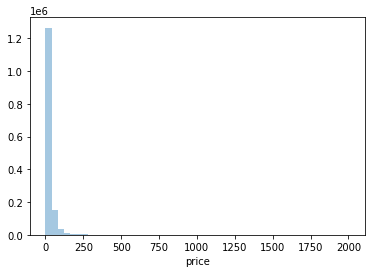

In [54]:
#타겟인 price의 데이터 분포 살펴보기

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)

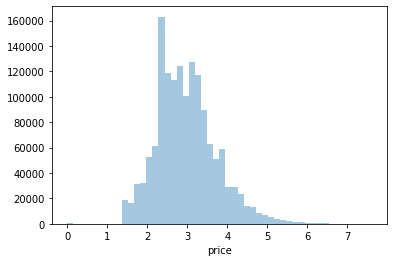

In [55]:
#가격이 적은 데이터에 왜곡돼 분포하므로 로그변환
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

In [56]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [57]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


- Shipping 은 배송비 유무로 균일한 값 가짐
- item_condition_id는 판매자가 제공하는 제품 상태 1,2,3이 주를 이룸
- item_description은 nullr값은 별로 없지만 별도 설명 없는 경우 No description yet으로 돼있음 -  확인

In [58]:
boolean_cond = mercari_df['item_description'] == 'No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [59]:
#category_name
#apply lambda에서 호출되는 대,중,소 분할 함수 생성, 대,중,소 값을 리스트로 반환
def split_cat(category_name):
  try:
    return category_name.split('/')
  except:
    return ['Other_Null', 'Other_Null', 'Other_Null']

#위의 split_cat()을 apply lambda에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = zip(*mercari_df['category_name'].apply(lambda x:split_cat(x)))

#대분류만의 값의 유형과 건수를 살펴보고, 중소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형 : \n', mercari_df['cat_dae'].value_counts())
print('중분류 개수 : ', mercari_df['cat_jung'].nunique())
print('소분류 개수 : ', mercari_df['cat_so'].nunique())





대분류 유형 : 
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수 :  114
소분류 개수 :  871


In [60]:
#brand_name, category_name, item_description 의 null값 OtherNull로 변경
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

In [61]:
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

###피처 인코딩과 피처 벡터화
- 상품 가격을 예측해야하므로 회귀 모델 기반으로
- 선형 회귀의 경우 원핫인코딩 적용이 선호되므로 원핫인코딩 적용
- 짧은 텍스트는 Count기반, 긴 텍스트는 TFIDF기반 벡터화 적용


In [62]:
#brand_name
print('brand name의 유형 건수 : ', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수 :  4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [63]:
#name
print('name의 종류 개수 : ',mercari_df['name'].nunique())
print('name sample 10건 : ', mercari_df['name'][:10])

name의 종류 개수 :  1225273
name sample 10건 :  0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


- brand_name : 좀 많지만 원핫인코딩 변환
- name : 종류 너무 많고 적은 단어 위주의 텍스트 형태로 돼 있으므로 Count 기반 피처 벡터화 변환 적용
- category_name : 대중소로 나눈 칼럼 원핫인코딩 적용
- shipping : 두 가지 유형, 원핫인코딩
- item_condition_id : 5가지 유형, 원핫인코딩
- item_description : 가장 긴 텍스트 TFIDF 변환

In [64]:
#name
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

#item_description
tfidf_descp = TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


- 변환된 데이터는 희소행렬형태, 인코딩 대상 칼럼도 밀집 행렬 형태가 아닌 희소 행렬 형태로 인코딩 적용한 뒤 함께 결합

In [65]:
#LabelBinarizer의 sparse_out=True 로 희소행렬 형태로 원핫인코딩 변환
from sklearn.preprocessing import LabelBinarizer

#brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원핫인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

#cat 피처들 희소 행렬 원핫인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [66]:
#피처 벡터화 변환한 데이터와 희소 인코딩 변환된 데이터 세트 결합
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

#hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

#데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


44

###릿지 회귀 모델 구축 및 평가
- RMSLE : RMSE와 유사하나 오류 값에 로그를 취해 RMSE를 구하는 방식, 낮은 가격보다 높은 가격에서 오류가 발생할 경우 오류 값이 더 커지는 것을 억제하기 위해 도입
  - price 로그 변환해둔 상태이므로 예측된 price 다시 로그의 역변환인 지수 변환으로 원복해야 함

In [68]:
def rmsle(y, y_pred):
  return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):
  preds_exmpm = np.expm1(preds)
  y_test_exmpm = np.expm1(y_test)

  rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
  return rmsle_result

In [75]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):

  X=hstack(matrix_list).tocsr()
  X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)

  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  del X, X_train, X_test, y_train
  gc.collect()

  return preds, y_test

In [76]:
linear_model = Ridge(solver="lsqr", fit_intercept=False)
sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 떄 rmsle 값:', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:', evaluate_org_price(y_test, linear_preds))

Item Description을 제외했을 떄 rmsle 값: 0.5023727038010556
Item Description을 포함한 rmsle 값: 0.47121951434336345


###LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가


In [77]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:', evaluate_org_price(y_test, lgbm_preds))

LightGBM rmsle 값: 0.4571958024426099


In [78]:
#앙상블
preds = lgbm_preds*0.45 + linear_preds*0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:', evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.45072592143293


- 앙상블로 성능 개선

##11. 정리
- 머신러닝 기반의 텍스트 분석 프로세스
  1. 텍스트 사전 정제 작업 등의 텍스트 정규화 작업 수행
  2. 이들 단어들을 피처 벡터화
  3. 피처 벡터 데이터 세트에 머신러닝 모델 학습, 예측, 평가

- 텍스트 정규화 : 텍스트 클렌징 밒 대소문자 변경, 단어 토큰화, 의미없는 단어 필터링, 어근 추출 등 피처 벡터화를 진행하기 이전에 수행하는 다양한 사전 작업
  - 피처 벡터화 - Count 기반, TFIDF 기반 - 길어지면 TFIDF 사용